<img align="left" width="32%" style="padding-right:10px;" src="Images/Ccom.png">


___
# Review of Linear Algebra
## 4 Linear Transformations

Jupyter Notebook Implementation: *Semme J. Dijkstra, 2022*

Original Linear Algebra text and in text examples: <br>*David E. Wells, Kresho Frankich, 1994*
___

<a href="https://teams.microsoft.com/l/team/19%3auL2OnH3RSfCWwU2Fd3VYGLT_03BYOfA3KB_OBp10CIY1%40thread.tacv2/conversations?groupId=5c11a428-14b6-429d-b7f5-a61ebc0a440b&tenantId=d6241893-512d-46dc-8d2b-be47e25f5666"><img src="Images/help.png"  title="Ask questions on Teams" align="right" width="10%" alt="Teams.com\"></a> 

Minor additional notes and edits: Semme J. Dijkstra, 2022<br>
Additional examples: Semme J. Dijkstra, 2022<br>
Python code and explanations: Semme J. Dijkstra, 2022
___

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import pi, sin, cos, sqrt
import numpy.linalg as la
from numpy.testing import assert_allclose
from my_code.latex_output import display_matrix, latex_matrix
from my_code.boat import boat
from my_code.plottransform import plottransform
from IPython.display import display, Math, Markdown, Latex
# %matplotlib notebook  # Can be useful when wanting to manipulate plots
from matplotlib.animation import FuncAnimation
%load_ext autoreload
%autoreload 2


___
<img align="left" width="6%" style="padding-right:10px;" src="./Images/info.png">

# LaTex<br>

This is a [Jupyter](https://jupyter.org/) notebook in which heavy use of [LaTex](https://www.latex-project.org/) is made. LaTex is *\"a high-quality typesetting system; it includes features designed for the production of technical and scientific documentation. LaTeX is the de facto standard for the communication and publication of scientific documents.\"* according to [the Latex project](https://www.latex-project.org/)

Latex allows the creation of macros and other type-setting methods of convenience. This particular Markdown cell you are reading is used for the definition of new LaTex operators and commands, but they are hidden from view. If you are interested: double click on this cell to enter its edit mode and you will be able see how they are implemented.

<div hidden>
$\usepackage{amsmath,amssymb}$

$\DeclareRobustCommand{\bbone}{\text{\usefont{U}{bbold}{m}{n}1}}$

$\DeclareMathOperator{\EX}{\mathbb{E}}% expected value$

$\DeclareMathOperator{\res}{\vec{r}}$

$\DeclareMathOperator{\mf}{\mu_{1}\sigma_{2}^{2}+\mu_{2}\sigma_{1}^{2}\over{\sigma_{1}^{2} + \sigma_{2}^{2}}}$
    
$\DeclareMathOperator{\sf}{{\sigma_{1}^{2}\sigma_{2}^{2}}\over{\sigma_{1}^{2}+\sigma_{2}^{2}}}$
    
$\newcommand{\ex}[1]{\mathbb{E}\{#1\}}$
    
$\newcommand{\dev}[1]{\mathbb{E}\{#1^o_i - \mathbb{E}\{#1\}\}}$
    
$\newcommand{\cov}[1]{\mathbb{E}\{(#1^o_i - \mathbb{E}\{#1\})(#1 - \mathbb{E}\{#1\})^T\}}$
    
$\newcommand{\m}[1]{\mathbf{#1}}$

$\newcommand{\col}[2]{\begin{pmatrix}#1 \\ #2 \end{pmatrix}}$
    
</div>

___
# 4 Linear Transformations

So-far we have mostly looked at vectors from an algebraic point of view, treating them as rows of columns of real numbers. From the geometric point of view we are familiar with the concept of a vector in two or three dimensions as a ***directed line segment***. We can describe such vectors in algebraic language by specifying the components with respect to some ***reference frame*** defined by a ***coordinate system***, which leads to a row (or column) of two or three real numbers, as before. We know that such vectors can also be uniquely defined by specifying their ***length*** and ***direction***.

We can generalize these geometric ideas and interpret a row or column of $n \in \mathbb{N}^+$ real numbers as a vector in the same sense as in two or three dimensions. The problem is that if $n>3$ we can no longer draw a picture of the vector. However, all the properties of the $2$D or $3$D vectors can be maintained for $n$-dimensional vectors.

For example: the ***length*** of a vector:

$$\lVert x\lVert=\sqrt{\m{x}^T\m{x}}\tag{124}$$

which leads to:

$$\lVert x\lVert=\sqrt{\sum_{i=1}^n}x_i^2\tag{125}$$

and the ***orientation*** of a vector (as represented by its vector of ***direction cosines***)

$$\m{u}_x = \dfrac{\m{x}}{\lVert x\lVert}\tag{126}$$

Note that the ***direction cosines*** are the cosines of the angles that the directed line segment makes which each of the axes of the reference frame respectively.

For any two vectors having the same number of elements, the ***scalar*** product between them is

$$\m{x}^T\m{y} = \m{y}^T\m{x} =\sqrt{\sum_{i=1}^n}x_i y_i\tag{127}$$

The ***distance*** between the end-points of the two vectors is:

$$\lVert x-y\lVert = \sqrt{\sum_{i=1}^n}(x_i-y_i)^2\tag{128}$$

and the ***angle*** in the plane subtended between the two vectors is (from the cosine rule):

$$\cos\theta=\dfrac{\m{x}^T\m{y}}{\lVert x\lVert\lVert y\lVert}\tag{129}$$

The matrix equation:
<a id='eq130'></a>
$$\m{y} = \m{Ax}+\m{b}\tag{130}$$

where $\m{A}$ is a matrix, can be regarded as a ***linear transformation*** of $\m{x}$, in which the matrix $\m{A}$ is called the ***transformation matrix*** and $\m{b}$ is the ***translation vector***. There are two related interpretations of such transformations:

- $\m{x}$ and $\m{y}$ are different vectors whose elements are referred to the same reference frame<br>
    The transformation matrix describes the coordinates of $\m{y}$ in terms of the coordinates of $\m{x}$, or the operations that must be performed on  $\m{x}$ to transform it into $\m{y}$
<br><br>
- $\m{x}$ and $\m{y}$ are the same vector whose elements are referred to different reference frames<br>
    The transformation matrix describes the relationship between the reference frames, or the operations that must be performed on the coordinate system to which $\m{x}$ refers to transform it into the coordinate system to which $\m{y}$ refers

___
## 4.0 Introduction to Transforms and Python

Note that `matplotlib` has a `transforms` module that implement most commonly used linear transforms in an efficient manner. Since this module is specifically aimed at learning about the transforms we will often not use the `matplotlib` functionality, but rather implement them ourselves. Even more efficiency than using `matplotlib` may be gained by using code that specifically makes use of your GPU, this may be done with modules such as `pygame` and can gain you significant performance benefits if so required. One of the goals of these notebooks is then to give you the foundations required to understand the functionality of such highly optimized transformation algorithms.

Before we go much further let's look at the code example below. For this code example we will define $n$ vertices $\m{v}_i,i\in \mathopen[0\dots n\mathclose)$ representing a simple boat shape and capture them as a polygon in matrix $\m{B}$ represented by variable B:

$$\m{v}_1=\col{-6}{-2}, \m{v}_2=\col{4}{-2}, \m{v}_3=\col{6}{0}, \m{v}_4=\col{4}{2}, \m{v}_5=\col{-6}{2}$$

$$\m{B} = \left(\begin{array}{c|c|c|c|c}\m{v}_1&\m{v}_2&\m{v}_3&\m{v}_4&\m{v}_5\end{array}\right) = \begin{pmatrix} -6&4&6&4&-6\\ -2&-2&0&2&2\end{pmatrix}$$

Matrix B holds a polygon defining a boat shape


<IPython.core.display.Math object>

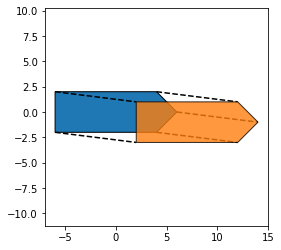

In [4]:

B = np.asarray([[-6, 4, 6, 4, -6],[-2, -2, 0, 2, 2]])
t =  np.asarray([[8],[-1]])
Bt = B + t
print('Matrix B holds a polygon defining a boat shape')
display_matrix(B)

plt.figure(figsize=(4, 4))
plt.axis('equal')
plt.fill(B[0,:],B[1,:],'C0', ec='k',zorder=0)
for i in range(B.shape[1]):
    plt.plot([B[0,i], Bt[0,i]],[B[1,i],Bt[1,i]],'k--',zorder=1)
    
plt.fill(Bt[0,:],Bt[1,:],'C1', ec='k', alpha=.8,zorder=2)
plt.show()

What all happened here?

    B = np.asarray([[-6, 4, 6, 4, -6],[-2, -2, 0, 2, 2]])
    
Creates a `numpy` array defining the matrix $\m{B}$ that holds a polygon of vertices in the form of the top view of a, admittedly, simple boat (shown in blue in the plot). Note that it would be more 'pythonesque' to name the matrix `B` `boat` instead, as it is more descriptive. However, since the purpose here is to illuminate principles of linear algebra we will follow the common usage of using a single capital letter, possibly augmented by a lower case specifier, as the name of a matrix. The vertices of the matrix are then given by the columns of matrix `B`, where the row 0 element defines the 0-axis (horizontal) position, and the row 1 element defines the 1-axis (vertical) position.

    t =  np.asarray([[8],[-1]])
    
Creates a column vector with the elements `8` and `-1`

    Bt = B + t
    
This is the statement that really warrants the step-by-step explanation; what happens here is not part of traditional linear algebra, but is a very useful addition for when you program - the process is called **implicit expansion** and allows you to write cleaner looking code. In linear algebra there is a mismatch in dimensions in the expression written above; Python recognizes this and replaces the vector $\m{t}$ represented by the variable `t` by the matrix $[\m{t, t, ... t}]$ matching the number of columns in `B` and thus resulting in the addition of the vector `t` to every vertex contained within `B`. Thus matrix `Bt` is matrix `B` transformed by pure translation vector `t` (you'll learn what a pure translation is next).

    print('Matrix B holds a polygon defining a boat shape')
    display_matrix(B)

This just lets the user know the numerical contents of `B` in an appropriate format using LaTeX.

    plt.figure(figsize=(8, 8))

This creates the plot canvas

    plt.axis('equal')
    
This equals the scaling of the units on the plot axes (1 unit on the 0-axis matches in size to 1 unit on the 1-axis).

    plt.fill(B[0,:],B[1,:],'C0', ec='k',zorder=0)
    
This plots the matrix `B` as a filled polygon, using row 0 elements for the 0-axis coordinates, row 1 elements for the 1-axis, the first color in the color cycle C0, a black outline 'k', and puts the `zorder` at 0 i.e., in the background.

    for i in range(B.shape[1]):
        plt.plot([B[0,i], Bt[0,i]],[B[1,i],Bt[1,i]],'k--',zorder=1)
        
This plots black dotted connecting lines from all polygon vertices `i` contained in B to its transformed vertices in `Bt`. Since `zorder=1` the vertices are drawn over the previously drawn polygon.

    plt.fill(Bt[0,:],Bt[1,:], alpha=.8,zorder=2)
    
This plots the transformed matrix `Bt` in the second color in the color cycle (C1), and a black outline ('k') over all previously drawn shapes. Those still are visible because the polygon is made transparent by setting the value `alpha=.8`

    plt.show()
    
This forces the plot to be shown on the screen.

### 4.0 Self study exercise 1

    a) Add at least 4 vertices to the boat matrix B
    b) Create a different vector t
    c) Perform a pure translation of B using t
    
In the mycode folder you will find the file plottransform.py containing the function `plottransform` that takes the arguments B and Bt.

    d) Update function plottransform so that it reproduces the plot produced by the code cell above (hint, a simple copy and paste operation should achieve your goal)

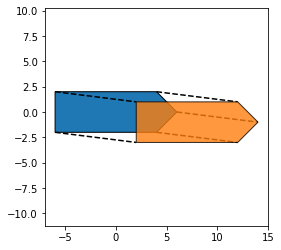

In [5]:
### 4.0 Self study exercise 1

B = np.asarray([[-6, 4, 6, 4, -6],[-2, -2, 0, 2, 2]])
t =  np.asarray([[8],[-1]])
Bt = B + t
fg = plt.figure(figsize=(4, 4));
plottransform(B,Bt)
plt.show()

___
## 4.1 Special (Affine) Transformations

In this section we restrict our attention to matrices that are square and nonsingular ($\text{det}\left(\m{A}\right)\neq 0$) in which case the inverse $\m{A}^{-1}$ exists, so that:

$$\m{x}=\m{A}^{-1}\left(\m{y}-\m{b}\right)\tag{131}$$

This restricted class of linear transformations are called ***affine transformations*** which have as a property that they may be inverted to obtain the original vector $\m{x}$. There are six kinds of ***elementary affine transformations***. Any general affine transformation can be factored into a sequence of these elementary transformations. Note that there is one special affine transformation for which $\m{A} = \m{I}$ which is known as:

    pure translation
    
for all others $\m{b} = \m{0}$ thus, these are known as ***homogeneous affine transformations*** and are called: 

    rotation
    reflection
    scalar transformation
    simple elongation
    simple shear

We will look at all these individually.

___
<a id='4_1_2_Pure_Translation'></a>
### 4.1.1 Elementary Affine Transformations: Pure Translation

The only non-homogeneous elementary affine transformation is ***pure translation*** w

$$\m{y} = \m{x}+\m{b}\tag{132}$$

for which, in [(130)](#eq130)

$$\m{A} = \m{I}\tag{133}$$

An example is:

$$_2t_1=\begin{pmatrix} 8 \\ -1 \end{pmatrix}\tag{134}$$

translating

$$_2x_1=\begin{pmatrix} 4 \\ 1 \end{pmatrix}\tag{135}$$

by $\m{t}$ gives:

$$\m{y}= \m{x}+\m{t}=\begin{pmatrix} 12 \\ 0 \end{pmatrix}\tag{136}$$

<img align="left" width="30%" style="padding-right:10px;" src="Images/pure_translation.png">

<br><br>Translating all vertices of the boat $\begin{pmatrix}-6\\-2\end{pmatrix}$,$\begin{pmatrix}4\\-2\end{pmatrix}$,$\begin{pmatrix}6\\0\end{pmatrix}$,$\begin{pmatrix}4\\2\end{pmatrix}$,$\begin{pmatrix}-6\\2\end{pmatrix}$ produces the result shown in the figure to the left


___
#### 4.1.1 Self Study Exercise 1

We will illustrate the elementary affine transforms using figures. In this exercise we will aim to reproduce the figure above. To this end we will update the `plottransform()` function you created to take an additional argument named `plot_title` with a default value of an empty string i.e., `plot_title = ''`. We will use this argument to plot an appropriate title.

    a) Add the `plot_title = ''` argument to the function declaration of `plottransform()`
    b) Update the `plottransform` code so that it will plot the title using `plt.title()`
    c) Create a matrix of vertices called `X` and assign it the vertices returned by the `boat()`
    d) Define the translation vector `t` according to (134)
    e) Transform `X` to `Xt` using the pure translation given by `t`
    f) create a 8x8 figure `fg` using the `plt.figure()` function 
    g) Plot `X` and its transform `Xt` with the title 'Pure Translation' using `plottransform()`
    h) Verify that your plot corresponds to the figure above
    

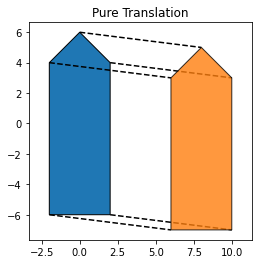

In [6]:
X = boat()
t =  np.asarray([[8],[-1]])
Xt = X + t
fg = plt.figure(figsize=(4, 4));
plottransform(X,Xt,'Pure Translation')
plt.show()

___
<a id='Rotation'></a>
### 4.1.2 Special Transformations: Rotation and Reflection

***Rotations*** and ***Reflections*** leave the length of a vector unchanged, hence the length of the square of a vector also remains unchanged. Thus given a transformation (rotation or reflection) matrix $\m{A}$, for any arbitrary $\m{x}$ we will obtain the transformed (rotated or reflected vector)

$$\m{y} = \m{Ax}\tag{137}$$ 

such that

$$\m{y}^T\m{y} = \m{x}^T\m{x}\tag{138}$$

or

$$\m{y}^T\m{y} = \left(\m{Ax}\right)^T\m{Ax}=\m{x}^T\left(\m{A}^T\m{A}\right)\m{x}=\m{x}^T\m{x}\tag{139}$$

Therefore

$$\m{A}^T\m{A}=\m{I}\tag{140}$$

That is, the transformation matrix must be ***orthogonal***. Rotation matrices are ***proper*** orthogonal matrices i.e, 

$$\text{det}\left(\m{A}\right)=+1\tag{141}$$

Reflection matrices are ***improper*** orthogonal matrices i.e, 

$$\text{det}\left(\m{A}\right)=-1\tag{142}$$

Any improper matrix can be expressed  as the product of a rotation and a reflection. The inverse of a rotation is its transpose, the inverse of a reflection is itself.

An example of a rotation matrix is:

$$_2\m{R}_2=\begin{pmatrix}\cos 30^o & \sin 30^o \\ -\sin 30^o & \cos 30^o\end{pmatrix}\tag{143}$$

Transforming

$$\m{x}=\begin{pmatrix}4\\1\end{pmatrix}\tag{144}$$

by $\m{R}$ gives:

$$\m{y}=\m{Rx}=\begin{pmatrix}3.96\\-1.13\end{pmatrix}\tag{145}$$


<img align="left" width="30%" style="padding-right:10px;" src="Images/rotation.png">

<br><br>Rotating all vertices of the boat $\begin{pmatrix}-6\\-2\end{pmatrix}$,$\begin{pmatrix}4\\-2\end{pmatrix}$,$\begin{pmatrix}6\\0\end{pmatrix}$,$\begin{pmatrix}4\\2\end{pmatrix}$,$\begin{pmatrix}-6\\2\end{pmatrix}$ by $\m{R}$ produces the result shown in the figure to the left

___
#### 4.1.2 Self Study Exercise 1

Similar to how you reproduced the pure translation figure, reproduce the rotation figure shown above 

    a) Create a matrix of vertices called `X` and assign it the vertices returned by the `boat()`\
    b) Define the rotation angle `th` as pi/6 radians (we use radians)
    c) Define the rotation matrix `R` according to (143), using angle th 
    d) Transform `X` to `Xt` using the rotation defined by `R`
    e) create a 8x8 figure `fg` using the `plt.figure()` function 
    f) Plot `X` and its transform `Xt` with the title 'Rotation' using `plottransform()`
    g) Verify that your plot corresponds to the figure above
    h) Is this rotation in the direction that you expected?
    

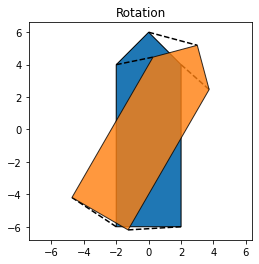

In [7]:
X = boat()
th = pi/6
R = np.asarray([[cos(th), sin(th)],[-sin(th),cos(th)]])
Xt = R@X
fg = plt.figure(figsize=(4, 4))
plottransform(X,Xt,'Rotation')
plt.show()

q_4_1_2_1_h = 'I expected that a positive rotation would rotate the boat in clockwise/anticlockwise direction'

___

An example of a reflection matrix is:

$$_2\m{F}_2 = \begin{pmatrix}-1&0\\0&-\end{pmatrix}\tag{146}$$

Transforming

$$\m{x} = \begin{pmatrix}4\\1\end{pmatrix}\tag{147}$$

by $\m{F}$ gives

$$\m{y} = \m{Fx}=\begin{pmatrix}-4\\1\end{pmatrix}\tag{148}$$

<img align="left" width="30%" style="padding-right:10px;" src="Images/reflection.png">

<br><br>Reflecting all vertices of the boat $\begin{pmatrix}-6\\-2\end{pmatrix}$,$\begin{pmatrix}4\\-2\end{pmatrix}$,$\begin{pmatrix}6\\0\end{pmatrix}$,$\begin{pmatrix}4\\2\end{pmatrix}$,$\begin{pmatrix}-6\\2\end{pmatrix}$ by $\m{F}$ produces the result shown in the figure to the left

___
#### 4.1.2 Self Study Exercise 2

Similar to how you reproduced the Rotation figure, reproduce the Reflection figure shown above 

    a) Create a matrix of vertices called `X` and assign it the vertices returned by the `boat()`\
    b) Define the reflection matrix `F` according to (146)
    c) Transform `X` to `Xt` using the reflection defined by `F`
    d) create a 8x8 figure `fg` using the `plt.figure()` function 
    e) Plot `X` and its transform `Xt` with the title 'Reflection' using `plottransform()`
    f) Verify that your plot corresponds to the figure above
    

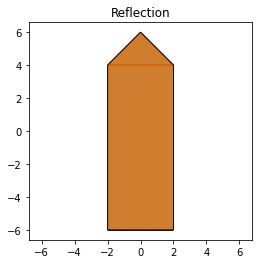

In [8]:
X = boat()
F = np.asarray([[-1,0],[0,1]])
Xt = F@X
fg = plt.figure(figsize=(4, 4))
plottransform(X,Xt,'Reflection')
plt.show()


___
<a id='Scalar_Transformation'></a>
### 4.1.3 Scalar Transformation

A scalar transformation leaves the direction of a vector unchanged, hence can only change vector lengths. This transformation produces the same change in length (or scale) whatever the vector, and has a ***scalar transformation matrix***

$$\m{A} = k\m{I}\tag{149}$$ 

such that

$$\m{y} = \m{Ax}\tag{150}$$

can be written

$$\m{y} = k\m{x}\tag{151}$$

The inverse of a scalar transformation $k$ is $\dfrac{1}{k}$

an example of a scalar transformation is:

$$_2K_2 = \begin{pmatrix} \sqrt{3} & 0 \\ 0 & \sqrt(3) \end{pmatrix}\tag{152}$$ 

Transforming

$$\m{x} = \begin{pmatrix}4\\1\end{pmatrix}\tag{153}$$

by $\m{K}$ gives

$$\m{y} = \m{Kx}=\begin{pmatrix}6.93\\1.73\end{pmatrix}\tag{154}$$

<img align="left" width="30%" style="padding-right:10px;" src="Images/scaling.png">

<br><br>Scaling all vertices of the boat $\begin{pmatrix}-6\\-2\end{pmatrix}$,$\begin{pmatrix}4\\-2\end{pmatrix}$,$\begin{pmatrix}6\\0\end{pmatrix}$,$\begin{pmatrix}4\\2\end{pmatrix}$,$\begin{pmatrix}-6\\2\end{pmatrix}$ by $\m{K}$ produces the result shown in the figure to the left

___
#### 4.1.3 Self Study Exercise 1

Similar to how you reproduced the Reflection figure, reproduce the Scalar Transformation figure shown above 

    a) Create a matrix of vertices called `X` and assign it the vertices returned by the `boat()`\
    b) Define the scalar matrix `K` according to (152)
    c) Transform `X` to `Xt` using the scaling defined by `K`
    d) create a 8x8 figure `fg` using the `plt.figure()` function 
    e) Plot `X` and its transform `Xt` with the title 'Scaling' using `plottransform()`
    f) Verify that your plot corresponds to the figure above
    

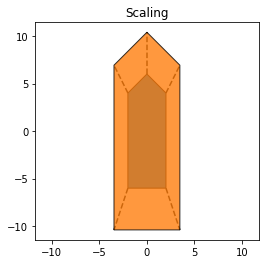

In [9]:
X = boat()
K = np.asarray([[3**.5,0],[0,3**.5]])
Xt = K@X
fg = plt.figure(figsize=(4, 4))
plottransform(X,Xt,'Scaling')
plt.show()

<a id='Simple_Elongation'></a>
### 4.1.4 Simple Elongation

A Simple Elongation or compression changes the scale along one coordinate axis only, and has a diagonal matrix in which all diagonal elements but one are $+1$. The remaining element, corresponding to the scale change axis, is either greater than one (for elongation), or less than one (for compression). The inverse of such a transform contains the reciprocal of the scale change in the same diagonal location. An example is:

$$_2E_2 = \begin{pmatrix} 1& 0 \\ 0 & 2 \end{pmatrix}\tag{155}$$ 

Transforming

$$\m{x} = \begin{pmatrix}4\\1\end{pmatrix}\tag{156}$$

by $\m{E}$ gives

$$\m{y} = \m{Ex}=\begin{pmatrix}4\\2\end{pmatrix}\tag{157}$$

<img align="left" width="30%" style="padding-right:10px;" src="Images/elongation.png">

<br><br>Elongating all vertices of the boat $\begin{pmatrix}-6\\-2\end{pmatrix}$,$\begin{pmatrix}4\\-2\end{pmatrix}$,$\begin{pmatrix}6\\0\end{pmatrix}$,$\begin{pmatrix}4\\2\end{pmatrix}$,$\begin{pmatrix}-6\\2\end{pmatrix}$ by $\m{E}$ produces the result shown in the figure to the left

___
#### 4.1.4 Self Study Exercise 1

Similar to how you reproduced the Scalar figure, reproduce the Elongation Transformation figure shown above 

    a) Create a matrix of vertices called `X` and assign it the vertices returned by `boat()`\
    b) Define the elongation matrix `E` according to (155)
    c) Transform `X` to `Xt` using the scaling defined by `E`
    d) create a 8x8 figure `fg` using the `plt.figure()` function 
    e) Plot `X` and its transform `Xt` with the title 'Elongation' using `plottransform()`
    f) Verify that your plot corresponds to the figure above
    

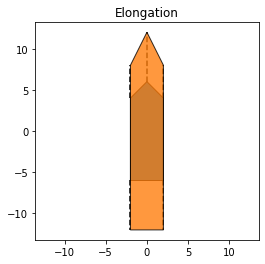

In [10]:
X = boat()
E = np.asarray([[1,0],[0,2]])
Xt = E@X
fg = plt.figure(figsize=(4, 4))
plottransform(X,Xt,'Elongation')
plt.show()


<a id='Simple_Elongation'></a>
### 4.1.5 Simple Elongation

A Simple Shear or compression involves shear along one coordinate axis only, and has a transformation matrix in which all diagonal elements are $+1$ and only one off-diagonal element is non-zero. The inverse of such a transform contains the negative of the off-diagonal component in the same location. An example is:

$$_2S_2 = \begin{pmatrix} 1& 3 \\ 0 & 1 \end{pmatrix}\tag{158}$$ 

Transforming

$$\m{x} = \begin{pmatrix}4\\1\end{pmatrix}\tag{159}$$

by $\m{S}$ gives

$$\m{y} = \m{Sx}=\begin{pmatrix}7\\1\end{pmatrix}\tag{160}$$

<img align="left" width="30%" style="padding-right:10px;" src="Images/shear.png">

<br><br>Shearing all vertices of the boat $\begin{pmatrix}-6\\-2\end{pmatrix}$,$\begin{pmatrix}4\\-2\end{pmatrix}$,$\begin{pmatrix}6\\0\end{pmatrix}$,$\begin{pmatrix}4\\2\end{pmatrix}$,$\begin{pmatrix}-6\\2\end{pmatrix}$ by $\m{S}$ produces the result shown in the figure to the left

___
#### 4.1.5 Self Study Exercise 1

Similar to how you reproduced the Elongation figure, reproduce the Shear Transformation figure shown above 

    a) Create a matrix of vertices called `X` and assign it the vertices returned by `boat()`\
    b) Define the shear matrix `S` according to (158)
    c) Transform `X` to `Xt` using the scaling defined by `S`
    d) create a 8x8 figure `fg` using the `plt.figure()` function 
    e) Plot `X` and its transform `Xt` with the title 'Elongation' using `plottransform()`
    f) Verify that your plot corresponds to the figure above
    g) Rotate the boat by 
    

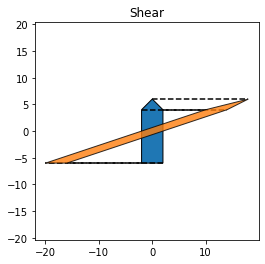

In [11]:
X = boat()
S = np.asarray([[1,3],[0,1]])
Xt = S@X
fg = plt.figure(figsize=(4, 4))
plottransform(X,Xt,'Shear')
plt.show()


___
<a id='Affine_properties'></a>
## 4.1.6 Special (Affine) Transformations: Properties and Examples

From the figures in 4.1.1 through 4.1.5 we see that

- Translations, rotations, and reflections preserve shape and size, but may change orientation. Such transformations are often referred to as ***rigid body*** transformations

- Translations, rotations, reflections and, scalar transformations preserve the shape (size of the angles) of the figure. Such transformations are called ***isogonal*** 

- All affine transformations transform parallel lines into parallel lines

Examples of general affine transformations are:

$$_2G_2 = \begin{pmatrix}-3&2\sqrt{3} \\ 2\sqrt{3} & -1\end{pmatrix}\tag{161}$$

and

$$_2H_2 = \begin{pmatrix}3&0 \\ 3\sqrt{3} & -2\end{pmatrix}\tag{162}$$

Each such affine transformations can be represented by sequences of elementary affine transformations, for example:

$$_2G_2 = \begin{pmatrix}3&0 \\ 0 & 3\end{pmatrix}
\begin{pmatrix}1& 0 \\ \dfrac{-2}{\sqrt{3}} & 1\end{pmatrix}
\begin{pmatrix}-1&0 \\ 0 & 1\end{pmatrix}
\begin{pmatrix}1&\dfrac{-2}{\sqrt{3}} \\ 0 & 1\end{pmatrix}\tag{163}$$

___
#### 4.1.6 Self Study Exercise 1

    a) Create an array `G` representing (161) and display is using `display_matrix()`
    b) Represent the elementary affine transformations of (161) by `A1`,`A2`,`A3` and,`A4`
    c) Calculate  and display the result of (161) using `A1`,`A2`,`A3` and,`A4`
    

In [12]:
G = np.array([[-3,2*sqrt(3)],[2*sqrt(3),-1]])
print('G:')
display_matrix(G)
A1 = np.array([[1,-2/sqrt(3)],[0,1]])
A2 = np.array([[-1,0],[0,1]])
A3 = np.array([[1,0],[-2/sqrt(3),1]])
A4 = np.array([[3,0],[0,3]])
print('A4@A3@A2@A1)')
display_matrix(A4@A3@A2@A1)


G:


<IPython.core.display.Math object>

A4@A3@A2@A1)


<IPython.core.display.Math object>

___
#### 4.1.6 Self Study Exercise 2

    a) Create an array `H` representing (162) and display is using `display_matrix()`
    b) Find a sequence of n elementary affine transformations that represents the transformation `H`
    c) Create a sequence of matrices `Ai` (i = 1 through n) that represent the matrices from b)
    d) Calculate  and display the result of performing the sequence of transformations


In [13]:
H = np.array([[3,0],[3*sqrt(3),-2]])
print('H:')
display_matrix(H)

A1 = np.array([[1,0],[3/sqrt(3),1]])
A2 = np.array([[3,0],[0,3]])

display_matrix(A2@A1)

H:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

___
<a id='Eigen'></a>
## 4.2 Eigenvalues and Eigenvectors of Symmetric Matrices

A problem which often arises concerning a linear transformation matrix $\m{C}$ is to find the vectors $\m{x}$ which will be changed in length but not in direction by $\m{C}$. Expressed in equation form, this problem is, given $\m{C}$, find $\lambda$ and $\m{x}$ such that:

<a id='eq164'></a>
$$\m{Cx} = \lambda\m{x}\tag{164}$$

Solutions may exist for any $\m{C}$, but this discussion is restricted to non-singular matrices $\m{C}$. We can rewrite [(164)](#eq164) as:

<a id='eq165'></a>
$$\left(\m{C}-\lambda \m{I}\right)\m{x} = \m{0}\tag{165}$$

which is a system of homogeneous equations. As shown in [3 Solution of Linear Equations](3_Solution_of_Linear_Equations.ipynb#Possible_Linear_Equation_Relationships) a non-trivial solution for $\m{x}$ exists only when the rank of $\left(\m{C}-\lambda \m{I}\right)$ is less than the dimension of $\m{x}$, that is when $\left(\m{C}-\lambda \m{I}\right)$ is singular or:

<a id='eq166'></a>
$$\text{det}\left(\m{C}-\lambda \m{I}\right)=0\tag{166}$$

This equation is called the ***characteristic equation*** of the matrix $\m{C}$ and serves to determine $n$ values of $\lambda$, where $n$ is the order of $\m{C}$. These values $\lambda$ are called the ***Eigenvalues*** (or *characteristic roots* or *latent roots*) of the matrix $\m{C}$. For symmetric matrices the Eigenvalues are always real numbers. For each Eigenvalue $\lambda_i$ there is a nonzero Eigenvector $\m{x}_i$ that satisfies [(165)](#eq165) called the ***Eigenvector*** (or *characteristic vector* or *latent vector*) of $\m{C}$ corresponding to Eigenvalue $\lambda_i$. For symmetric matrices the Eigenvectors corresponding to Eigenvalues with different values are orthogonal i.e.:

$$\m{x}_i\perp \m{x}_j\;\;\forall i\neq j\tag{167}$$

For non-singular matrices $\m{C}$, [(166)](#eq166) forces the rank of $\text{det}\left(\m{C}-\lambda \m{I}\right)$ to be exactly one less than the dimension of $\m{x}$ in [(165)](#eq165). In this case, as shown in [3 Solution of Linear Equations](3_Solution_of_Linear_Equations.ipynb#Possible_Linear_Equation_Relationships), $\m{x}$ is not uniquely determined, one element of $\m{x}$ must be (not-so) arbitrarily defined. We remove this arbitrary specification by specifying that the Eigenvectors $\m{x}$ each have a length of one, that is:

<a id='eq168'></a>
$$\m{x}^T\m{x} = 1\tag{168}$$

For each value $\lambda_i$ and its equivalent Eigenvector $\m{x_i}$, we have from [(164)](#eq164):

$$\m{Cx}_i=\lambda_i\m{x}_i \;\; \forall\;\; i\in[1\dots n]\tag{169}$$

We can then combine these $n$ equations into:

$$\m{CP} = \m{DP}\tag{170}$$

where $\m{P}$ is an $n\times n$ matrix whose columns are the normalized Eigenvectors $\m{x}_i$ and, $\m{D}$ is a diagonal matrix whose elements are the Eigenvalues $\lambda_i$. Because $\m{D}$ is diagonal each one of the Eigenvalues acts as a scalar multiplier on the corresponding Eigenvector in $\m{P}$, and since [scalar multiplication is commutative](2_Matrix_Algebra.ipynb#eq23) it follows that:

<a id='eq171'></a>
$$\m{CP} = \m{PD}\tag{171}$$

Because the normalized Eigenvectors are orthogonal $\m{P}$ is an orthogonal matrix, so that:

$$\m{P}^{-1} = \m{P}^T\tag{172}$$

Since the determinant $\text{det}\left(\m{P}\right)=1\;\;\m{P}$ is a [**rotation** matrix](#Rotation)

combining with [(171)](#eq171):

<a id='eq173'></a>
$$\m{P}^T\m{CP} = \m{D}\tag{173}$$

We interpret [(173)](#eq173) by stating that every nonsingular symmetric matrix $\m{C}$ is ***orthogonally similar*** to a diagonal matrix $\m{D}$ made up of the Eigenvalues of $\m{C}$.,and the ***similarity transformation*** matrix $\m{P}$ is made up of column vectors that are the Eigenvectors of $\m{C}$.

For example, the symmetric matrix:
<a id='eq174'></a>
$$\begin{pmatrix}5&3 \\ 3&5\end{pmatrix}\tag{174}$$

has the characteristic equation:

$$\text{det}\left(\m{C}-\lambda \m{I}\right)=\text{det}\begin{pmatrix}(5-\lambda)&3 \\ 3&(5-\lambda)\end{pmatrix} = (5-\lambda)^2-9 = 0\tag{175}$$

or:

$$\lambda^2-10\lambda+16 = 0\tag{176}$$

which has solutions $\lambda_1 = 8$ and $\lambda_2 = 2$ i.e., the Eigenvalues of this $\m{C}$ are 8 and 2. for $\lambda_1 = 8$ the Eigenvector $\m{x}_1$ is found from [(165)](#eq165):

$$\left(\m{C}-\lambda_1 \m{I}\right)\m{x}_1 = \left[ \begin{pmatrix} 5&3 \\ 3&5 \end{pmatrix}-\begin{pmatrix}8 &0 \\ 0&8 \end{pmatrix} \right]\begin{pmatrix}x_{1,1} \\ x_{2,1} \end{pmatrix}=\begin{pmatrix}-3 & 3 \\ 3&-3 \end{pmatrix}\begin{pmatrix}x_{1,1} \\ x_{2,1} \end{pmatrix}=0\tag{177}$$

we enforce [(168)](#eq168) and combine with [(177)](#eq177):

$$\left.\begin{array}. \m{x}_1^T\m{x}_1&=&1 \\ x_{1,1}&=&x_{2,1}\end{array}\right\}\Rightarrow \m{x}_1 = \begin{pmatrix}\dfrac{1}{\sqrt{2}} \\ \dfrac{1}{\sqrt{2}} \end{pmatrix}\tag{178}$$ 

similarly for $\lambda_2 = 2$ the Eigenvector $\m{x}_1$ is:

$$\left(\m{C}-\lambda_1 \m{I}\right)\m{x}_2 = \left[ \begin{pmatrix} 5&3 \\ 3&5 \end{pmatrix}-\begin{pmatrix}2 &0 \\ 0&2 \end{pmatrix} \right]\begin{pmatrix}x_{1,2} \\ x_{2,2} \end{pmatrix}=\begin{pmatrix}3 & 3 \\ 3&3 \end{pmatrix}\begin{pmatrix}x_{1,2} \\ x_{2,2} \end{pmatrix}=0\tag{179}$$

again enforcing [(168)](#eq168) and combining with [(179)](#eq179):

$$\left.\begin{array}. \m{x}_2^T\m{x}_2&=&1 \\ x_{1,2}&=&-x_{2,2}\end{array}\right\}\Rightarrow \m{x}_2 = \begin{pmatrix}-\dfrac{1}{\sqrt{2}} \\ \dfrac{1}{\sqrt{2}} \end{pmatrix}\tag{180}$$ 

Hence:

$$\m{P} = \sqrt{2}\begin{pmatrix}1&-1 \\ 1&1\end{pmatrix}\tag{181}$$

$$\m{D} = \begin{pmatrix}8&0 \\ 0&2\end{pmatrix}\tag{182}$$

In [22]:
# Create two reference frame axes
X = np.array([[1,0],[0,1]])
Y = X.copy()
# Linear transformation matrix C
C = np.array([[5,3],[3,5]])

# Create an identity matrix of the order of C
I = np.eye(C.shape[0])

# Get the eigenvalues and vectors of C
l,P = la.eig(C)

# Demonstrate that the determinant of P is +1, thus that P is a rotation matrix
det_C = la.det(P)
try:
    assert_allclose(det_C,1)
    print('P is a rotation matrix')
except:
    print('P is a NOT rotation matrix')
    
# Also demonstrate that the transpose of P is the inverse of P
try:
    assert_allclose( P.T@P, I)
    print('The matrix multiplication of P and its transpose is identity i.e. the transpose is the inverse')
except:
    print('The matrix multiplication of P and its transpose is not identity i.e. the transpose is NOT the inverse!')

# Show the Eigenvalues and Eigenvectors and, that they satisfy the characteristic equation 
# Note that you should use the `numpy` `isclose` function to compare floating point numbers
for i in range(C.shape[0]):
    if np.isclose(la.det(C-l[i]*I), 0):
        print('The characteristic equation holds for eigenvalue %.2f'%l[i])
    else:
        print('The characteristic equation fails for eigenvalue %.2f'%l[i])

P is a rotation matrix
The matrix multiplication of P and its transpose is identity i.e. the transpose is the inverse
The characteristic equation holds for eigenvalue 8.00
The characteristic equation holds for eigenvalue 2.00


The output of the code cell is rather cryptic. Someone with python coding skills can easily understand what happened here. However for readers that do not have these skills a much more detailed output is required. We can make use of the fact that Jupyter notebooks have the capacity of displaying the LaTeX markup language. Thus we may replace the code in the cell above with:

In [26]:
# Linear transformation matrix C
C = np.array([[5,3],[3,5]])
s = '\\text{Coefficient matrix }\mathbf{C}=' + latex_matrix(C)
display(Math(s))

# Create an identity matrix of the order of C
I = np.eye(C.shape[0])

# Get the eigenvalues and vectors of C
l,P = la.eig(C)

# Show the Eigenvector matrix P
s = '\\text{ Eigenvector matrix }\mathbf{P}\\text{ of }\mathbf{C}=' + latex_matrix(P)
display(Math(s))

# Demonstrate that the determinant of P is +1, thus that P is a rotation matrix
det_C = la.det(P)
try:
    assert_allclose(det_C,1)
    s = '\\text{The determinant of Eigenvector matrix }\mathbf{P} \\text{ is: }%.2f \\text{, thus it is a proper orthogonal i.e., rotation matrix}'%(det_C)
except:
    s = '\\text{The determinant of Eigenvector matrix }\mathbf{P} \\text{ is: }%.2f \\text{, thus it is NOT a rotation matrix}'%(det_C)
display(Math(s))

# Also demonstrate that the transpose of P is the inverse of P
try:
    assert_allclose( P.T@P, I)
    s = '\\mathbf{P}\cdot\mathbf{P}^T=\mathbf{I}\\text{ thus the transpose of the Eigenvector matrix is its inverse}'
except:
    s = '\\mathbf{P}\cdot\mathbf{P}^T\neq\mathbf{I}\\text{ thus the transpose of the Eigenvector matrix is NOT its inverse}'
display(Math(s))

# Show the Eigenvalues and Eigenvectors and, that they satisfy the characteristic equation 
# Note that you should always use the `numpy` `isclose` function to compare floating point numbers
for i in range(C.shape[0]):
    print('___')
    s = '\\text{For Eigenvalue }\lambda_%d = %.2f \\text{ the Eigenvector }\mathbf{x}_%d = '%(i+1,l[i],i+1) + latex_matrix(P[:,i])
    display(Math(s))
    s = '\\text{The characteristic equation det}\left( \mathbf{C}-\lambda_%d\mathbf{I}\\right)=0'%(i+1)
    display(Math(s))
    s = '\\text{det}\left('+latex_matrix(C)+'-'
    s +=latex_matrix(l[i]*I)
    s +='\\right)='+'\\text{det}' 
    s += latex_matrix(C-l[i]*I) + '='
    s += '%.2f'%la.det(C-l[i]*I)
    display(Math(s))
    if np.isclose(la.det(C-l[i]*I), 0):
        display(Math('\\text{Thus for }\lambda_%d \\text{ the characteristic equation holds}'%(i+1)))
    else:
        display(Math('\\text{Thus for }\lambda_%d \\text{ the characteristic equation fails}'%(i+1)))
        



<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

___


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

___


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

The code cell above produces much more legible output, but at the cost of much harder to read code that takes significantly more time to create. Considering that you are learning to use Python for Linear Algebra we will stay more consistent with the first code cell. The second code cell is just to whet your appetite. We could have attempted to write the entire set of Linear Algebra Review notes in code cells; but they would likely have never been finished, due to it being unnecessarily complex and overly time consuming to do so. As a programmer you will often have to weigh complexity versus completeness (and define what completeness means in the first place).

___
<a id='Eigenvalue_Matrix_Characterization'></a>
### 4.2.1 Eigenvalue Characterization of Nonsingular Matrices $\m{C}$

A nonsingular matrix $\m{C}$ can now be characterized according to the magnitudes of its Eigenvalues

$$\begin{array}{|c|c|}\m{C}&\text{Eigenvalues of }\m{C}\\ \hline 
\text{positive definite} & \text{all positive} \\
\text{negative definite} & \text{all negative} \\
\text{positive semi-definite} & \text{all positive or zero} \\
\text{negative semi-definite} & \text{all negative or zero} \\
\text{indefinite} & \text{some positive, some negative} \\
\end{array}$$

There are many reasons that we should care about Eigenvectors and Eigenvalues. In Ocean Mapping they are prevalent in the characterization of uncertainty of estimates of an unknown such as a vessel position represented by e.g., vector $\m{x}$.

___
<a id='Eigenvalue_error_ellipses'></a>
### 4.3 Eigenvalues, Eigenvectors and, Error Ellipses

The vectors involved in Least Squares Adjustment usually have associated with them a ***covariance matrix***. A covariance matrix of unknown vector $\m{x}$ is nonsingular, often referred to as $\m{C_x}$. The diagonal elements of $\m{C_x}$ represent the variances of the corresponding elements of the unknown vector $\m{x}$ that is being estimated. Each off-diagonal element represents a covariance, or statistical dependence, between pairs of elements of $\m{x}$ i.e., the covariance between the $3^d$ and $5^{\text{th}}$ elements of $\m{x}$ may be found on row 3, column 5, or since it is symmetric, row 5, column 3, of the covariance matrix $\m{C_x}$. It may be proven from the fact that the variances are always greater than zero that a covariance matrix is always [positive definite](#Eigenvalue_Matrix_Characterization).

From [$\m{P}^T\m{C_x P} = \m{D}$](#eq173) it follows that every covariance $\m{C_x}$ is orthogonally similar to a diagonal matrix $\m{D}$ containing the Eigenvalues of $\m{C_x}$. Since $\m{D}$ is made up of the Eigenvalues of $\m{C_x}$ it will have non-zero positive values along its diagonal, be symmetric and, thus, nonsingular [(81)](2_Matrix_Algebra.ipynb#Inverse_of_a_Diagonal_Matrix_Computation). We can interpret $\m{D}$ as the covariance matrix of some other vector $\m{y}$, the elements of which are not statistically dependent. We know consider two questions

1) How are $\m{x}$ and $\m{y}$ related?<br>
2) What is the geometrical interpretation of $\m{C_x}$ and $\m{D}$?

First we consider a generalization of the expression $\m{x}^T\m{x}$ for the square of the length of a vector. This generalizations is $\m{x}^T\m{C_x}\m{x}$ and is known as the ***quadratic form***. In the special case where all the elements of $\m{x}$ have unit variance and are statistically independent $\m{C_x} = \m{I}$ and the quadratic form reduces to the length of $\m{x}$ squared

In [16]:
x = np.array([[1],[2],[3]])
print('x=')
display_matrix(x)
print('\nSquared length of x: 𝐱𝑇𝐱 = %.2f'%(x.T@x))
Cx = np.eye(3)
print('Elements of x have unit variance and are independent, thus Cx=')
display_matrix(Cx)
print('\nThe quadratic form remains identical to the squared length of x for C=I,  𝐱𝑇𝐂𝐱 = %.2f'%(x.T@Cx@x))

x=


<IPython.core.display.Math object>


Squared length of x: 𝐱𝑇𝐱 = 14.00
Elements of x have unit variance and are independent, thus Cx=


<IPython.core.display.Math object>


The quadratic form remains identical to the squared length of x for C=I,  𝐱𝑇𝐂𝐱 = 14.00


However, when $\m{C}\neq\m{I}$ the quadratic form can be interpreted as some kind of statistically weighted and correlated square of the "length" of $\m{x}$ i.e.,

$$\m{x}^T\m{C_x}\m{x}=k^2\tag{183}$$
 
Similarly we have  $\m{y}^T\m{D}\m{y}$, the quadratic form for $\m{y}$. Since $\m{D}$ is diagonal we only use statistically independent weights on each element of $\m{y}$ to compute the square of the "length" of $\m{y}$. If we force the "lengths" of $\m{x}$ and $\m{y}$ to be identical we find

$$\m{x}^T\m{C_x}\m{x} = \m{y}^T\m{D}\m{y}=k^2\tag{184}$$

From [(173)](#eq173) we have

$$\m{y}^T\m{Dy} = \m{y}^T\m{P}^T\m{C_x P}\m{y}\tag{185}$$

Hence we can see that we can preserve the equality of the "lengths" by setting:

<a id='eq186'></a>
$$\m{x}=\m{Py}\tag{186}$$

or, equivalently:
<a id='eq187'></a>
$$\m{y}=\m{P}^T\m{y}\tag{187}$$

This answers the first question: $\m{y}$ is obtained from $\m{x}$ by means of the transformation matrix $\m{P}^T$, the *rows* of which are the normalized Eigenvector of $\m{Cx}$, since $\m{P}$ is orthogonal and has:

$$\text{det}(\m{P})=1\tag{188}$$

this is some kind of rotation of $\m{x}$ into $\m{y}$. Thus we may consider that $\m{x}$ and $\m{y}$ represent the same vector in two reference frames that are rotated with respect to each-other.


In the code cell below you see an illustration of this. 

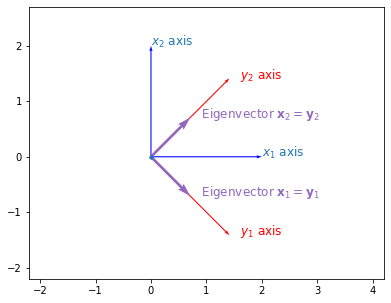

In [17]:
origin = np.array([0, 0])  # origin point
# Create two reference frame axes
X = np.array([[1, 0], [0, 1]])
Y = X.copy()
# Covariance matrix Cx
Cx = np.array([[5, 3], [3, 5]])
s = '\mathbf{C}=' + latex_matrix(Cx)
# display(Math(s))

# Create an identity matrix of the order of Cx
I = np.eye(Cx.shape[0])

# Get the eigenvalues and vectors of Cx
l, P = la.eig(Cx)

fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=(8, 5))

# Plot the axes for the Eigenvectors x contained in P
for i, x in enumerate(X.T):
    ax1.quiver(*origin, 2*x[0], 2*x[1], color='b', angles='xy', scale_units='xy',
               scale=1, width=.003, zorder=0)
    ax1.text(2*x[0], 2*x[1], '$   x_%d$ axis' %
             (i+1), color='C0', size='large', zorder=1)

# Plot the Eigenvectors as axes y
for i, y in enumerate(P):
    ax1.quiver(*origin, 2*y[0], 2*y[1], color='r', angles='xy', scale_units='xy',
               scale=1, width=.003, zorder=0)
    ax1.text(2*y[0], 2*y[1], '   $y_%d$ axis' %
             (i+1), color='r', size='large', zorder=1)

# Now plot the Eigenvectors
for i, p in enumerate(P):
    ax1.quiver(*origin, p[0], p[1], color='C4',
               angles='xy', scale_units='xy', scale=1)
    ax1.text(p[0], p[1], '   Eigenvector $\mathbf{x}_%d = \mathbf{y}_%d$' % (
        i+1, i+1), color='C4', size='large', zorder=2)

ax1.set_xlim((-2.2, 4.2))
ax1.set_ylim((-2.2, 2.7))
ax1.plot([0, 0], [0, 0], '.')

ax1.set_aspect('equal')
plt.draw()
plt.show()

From the code in the cell above and the figure that it produces it can be seen that the Eigenvectors $\m{x}$ of $\m{Cx}$ form an orthogonal basis for a new rotated coordinate system. The Eigenvectors $\m{x}_i$ are identical to $\m{y}_i$ in the new system, where $\m{y}_i$ are unit vectors defining the basis of the new system.

To answer the second question (what is the geometrical interpretation of 𝐂𝐱 and 𝐃?), we consider the equation

<a id='eq189'></a>
$$\m{y}^T\m{Dy}=\sum\lambda_i y_i^2 = k^2\tag{189}$$

where $\lambda_i$ are the Eigenvalues of C. We see that [(189)](#189) **is the equation of an ellipse (in two dimensions), an ellipsoid (in three dimensions), or some kind of hyper-ellipsoid (in higher dimensions)**


$$ \sum\lambda_i \dfrac{y_i^2}{k^2}=1\text{, equation of an ellipse with axes }\dfrac{k^2}{
\lambda_i}\;\;\forall\;\; i\tag{190}$$

Thus  $\lambda_i$ define the lengths of the ***principal axes*** and we can use $k$ to scale them.

However:

$$\m{x}^T\m{C_x x}=k^2\tag{191}$$

is identical to 

$$\m{y}^T\m{D y}=k^2\tag{192}$$

except for the rotational transformation [(186)](#186) or [(187)](#187) connecting them. Therefore the quadratic forms represent the ***same*** ellipse, but referred to different coordinate systems, and these coordinate systems are related through the transformation $\m{P}$ (as demonstrated in the code cell above). The Eigenvalues $\lambda_i$ of $\m{C}$ define the lengths of the principal axes of the ellipse represented by the quadratic forms of $\m{C}$ or $\m{D}$, and the normalized Eigenvectors of $\m{C}$ defines the directions of each of these principal axes with respect to the coordinate system in which $\m{C}$ is specified.


From the example [(174)](#174), which we also used in the code cell above, we have:

$$\m{C}=\begin{pmatrix}5&3 \\ 3 & 5\end{pmatrix}\tag{193}$$

$$\m{P}=\dfrac{1}{\sqrt{2}}\begin{pmatrix}1&-1 \\ 1 & 1\end{pmatrix}\tag{194}$$

$$\m{D}=\begin{pmatrix}8&0 \\ 0 & 2\end{pmatrix}\tag{195}$$

Note that we have cleverly selected $\m{C}$ to have normalized Eigenvectors such that the matrix whose columns are the these vector ($\m{P}$) represents a rotation of $45^o$. In equation form:

$$\m{P} = \begin{pmatrix}\cos 45^\circ & -\sin 45^\circ \\ \sin 45^\circ & \cos 45^\circ \end{pmatrix}\tag{196}$$

____

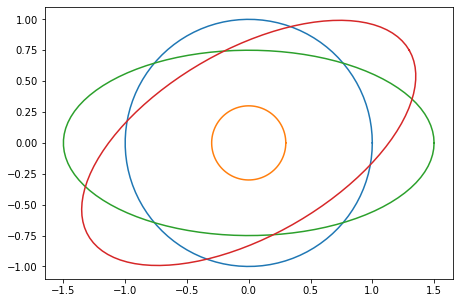

In [18]:
# Define a circle for plotting
t = np.linspace(0,2*pi,100)
circle = np.array([cos(t),sin(t)])
fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=(8, 5))
ax1.plot(circle[0,:],circle[1,:])

# Plot a different size circle
k = 1
small_circle = .3 * circle
ax1.plot(small_circle[0,:],small_circle[1,:])

# Plot an ellipse with semi-major axis a, and semi-minor axis b
a = 1.5
b = .75
D = la.inv(np.array([[a,0],[0,b]]))
ellipse = la.inv(D)@circle
ax1.plot(ellipse[0,:],ellipse[1,:])

# Plot a rotated, scaled ellipse
th = pi/6
R = np.array([[cos(th),-sin(th)],[sin(th),cos(th)]])
ellipse = k*R@la.inv(D)@circle
ax1.plot(ellipse[0,:],ellipse[1,:])


ax1.set_aspect('equal')
plt.show()

___

Before we go further we should quickly address how to plot circles and ellipses. It is simplest to use parametric equations for the drawing of a circle i.e.,

$$ \begin{array}{} t\in\{\mathbb{R}|0\leq t \leq 2\pi\} \\ x = \cos t \\ y=\sin t \end{array}\tag{197}$$ 

it is beneficial to group the x and y coordinates in a single numpy array:

    t = np.linspace(0,2*pi,100)
    circle = np.array([cos(t),sin(t)])
    
results in the `numpy` array `circle` whose columns contain the coordinates defining the perimeter of unit circle. The circle can then simply be scaled e.g.:

    k = .3
    small_circle = .3 * circle
    
generates a copy of the circle, whose radius is now `k` or 0.3

An ellipse is generated by scaling the x and y values independently, this scaling may be implemented in a diagonal matrix. For example if we want to create an with ellipse with semi-major axes `a=1.5` and semi minor axes `b=.75` we can create a diagonal matrix D so that:

$$\m{D} = \begin{pmatrix}a&0 \\ 0&b\end{pmatrix}^{-1}=\begin{pmatrix}\dfrac{2}{3}&0 \\ 0&\dfrac{4}{3}\end{pmatrix}^{-1}=\begin{pmatrix}1.5&0 \\ 0&0.75\end{pmatrix}\tag{197}$$ 

which in coding results in:

    a = 1.5
    b = .75
    D = la.inv(np.array([[a,0],[0,b]]))
    ellipse = la.inv(D)@circle
    ax1.plot(ellipse[0,:],ellipse[1,:])
    
- You may wonder why `D` is created by using the inverse of the matrix with the principal axe values. We chose to do this $\m{D}$ to stress the similarity between this matrix and the matrix of Eigenvectors $\m{D}$ that determines the size of the principal axes in the quadratic form ([(190)](#190) and [(192)](#192)) i.e., **we may use the inverse of the matrix of Eigenvalues directly to transform a circle into an ellipse** representing the quadratic form.
    
If we want to rotate the ellipse by $\pi/6$ we create a `numpy` array `R` representing a rotation matrix $\m{R}$ and then multiplying the ellipse 

    th = pi/6
    R = np.array([[cos(th),-sin(th)],[sin(th),cos(th)]])
    
We can also do this directly from the circle, but remember that matrices are generally not commutative i.e., the order of operations matters

    ellipse = R@D@circle
    
Finally we can scale the ellipse as a whole using a scalar e.g., the already defined `k` 


    ellipse = k*R@D@circle

All these manipulations are applied in, and visualized by, the code cell above


From [(189)](#189) we see that the quadratic form represents an ellipse. We can scale the size of the ellipse by choosing a value for $k$ e.g., $k^2=4$ leads to:

$$\m{x}^T\m{C_x x}=5x_1^2+3x_1x_2+3x_1x_2+5x_2^2=5x_1^2+6x_1x_2+5x_2^2=4\tag{198}$$

and (the much simpler):

$$\m{y}^T\m{D y}=8y_1^2+2y_2^2=4\tag{199}$$

What has gone on here geometrically?

<img align="center" width="60%" style="padding-right:10px;" src="Images/Quadratic_form_wrt_x.png">

The figure above shows a geometrical interpretation for the equation of an ellipse obtained from the quadratic form with the covariance matrix $\m{C_x}$, and referred to the coordinate system $\m{x}$ whose axes are not coincident with the axes of the ellipse, also shown is a second coordinate system $\m{y}$ with the coordinate axes aligned to the principal axes of the ellipse. As shown the ellipse is rotated $45^\circ$ counter-clockwise which is equivalent to rotating the coordinate system aligned to the ellipse $45^\circ$ clockwise, using the rotation matrix $\m{P}$ and the transformation:

$$\m{y} =\m{P}^T\m{x}\tag{200}$$

The axes of the new coordinate system are aligned to the Eigenvectors of $\m{C_x}$. The semi-axes $a_i$ of the ellipse are related to the Eigenvalues of $\m{C_x}$ and the value of the quadratic form $k^2$ by

$$a_i^2 =\dfrac{k^2}{\lambda_i}\Rightarrow a_i =\dfrac{k}{\sqrt{\lambda_i}}\tag{201}$$

in our case we chose $k^2 = 4$, so for $\lambda_1=8$

$$a_1 = \dfrac{1}{\sqrt{2}}\tag{202}$$

and for $\lambda_2=2$

$$a_2 = \sqrt{2}\tag{203}$$

___

<img align="center" width="30%" style="padding-right:10px;" src="Images/Quadratic_form_wrt_y.png">

For many applications with covariance matrices it is thus much simpler to perform operations in a coordinate system aligned to the principal axes (here $\m{y}$); a simple rotation then satisfies our need to show the results in the reference frame in which the covariance matrix is defined.

___
## 4.3 Self Study Exercise 1

The code below was used to generate the images in the paragraph above, in the code you see that the variable `y` gets defined first, then the variable `x` is generated by rotating `y`

    a) what does `y` represent? Use the term Eigenvectors, Principal axes, quadratic form, and ellipse 
       in your answer
    b) what does `x` represent? Use the same terms as in a)
    c) What is the advantage of defining `y` before `x`? 
    d) write some code that demonstrates that for every column of `x` and `y` the quadratic equations 
      (198) and (199)  hold valid. Remember to use `np.isclose()` instead of the `==` operator 
      for this purpose.

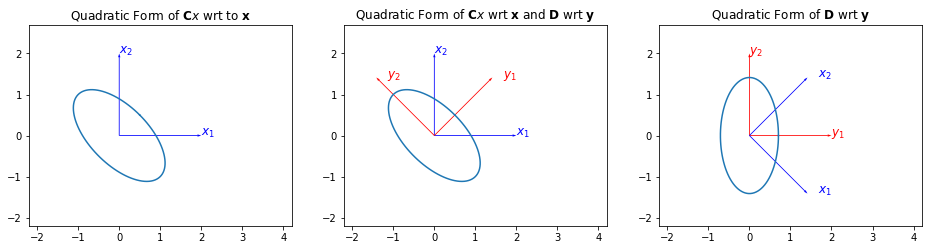

In [19]:
origin = np.array([0, 0])  # origin point

# Parametric representation of circle
t = np.linspace(0,2*pi,100)
circle = np.array([cos(t),sin(t)])

# Create two reference frame axes
X = np.array([[1, 0], [0, 1]])
Y = X.copy()

# The outcome k_2 of the quadratic equations (only appears as k^2)
k = 2

# Covariance matrix Cx
Cx = np.array([[5, 3], [3, 5]])
s = '\mathbf{C}=' + latex_matrix(Cx)
# display(Math(s))


# Get the eigenvalues and vectors of Cx
l, P = la.eig(Cx)

# For clarity explity create a Diagonal matrix D with the Eigenvalues along the diagonal
# Create an identity matrix of the order of Cx, note the use of the * (piecewise multiplier) 
# rather than the @ (matrix multiplier) operator
D = l*np.eye(Cx.shape[0])

fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, figsize=(16, 5))

# Plot the axes for the x-coordinate reference frame used in ax1, ax2
for i, x_ax in enumerate(X.T):
    ax1.quiver(*origin, 2*x_ax[0], 2*x_ax[1], color='b', angles='xy', scale_units='xy',
               scale=1, width=.003, zorder=0)
    ax1.text(2*x_ax[0], 2*x_ax[1], '$   x_%d$' %
             (i+1), color='b', size='large', zorder=1)
    ax2.quiver(*origin, 2*x_ax[0], 2*x_ax[1], color='b', angles='xy', scale_units='xy',
               scale=1, width=.003, zorder=0)
    ax2.text(2*x_ax[0], 2*x_ax[1], '$   x_%d$' %
             (i+1), color='b', size='large', zorder=1)
    
# Plot the axes for the y coordinate frame  used in ax3
for i, y_ax in enumerate(Y.T):
    ax3.quiver(*origin, 2*y_ax[0], 2*y_ax[1], color='r', angles='xy', scale_units='xy',
               scale=1, width=.003, zorder=0)
    ax3.text(2*y_ax[0], 2*y_ax[1], '$   y_%d$' %
             (i+1), color='r', size='large', zorder=1)


# Plot the Eigenvectors as axes
for i, y_ax in enumerate(P.T):
    ax2.quiver(*origin, 2*y_ax[0], 2*y_ax[1], color='r', angles='xy', scale_units='xy',
               scale=1, width=.003, zorder=0)
    ax2.text(2*y_ax[0], 2*y_ax[1], '   $y_%d$' %
             (i+1), color='r', size='large', zorder=1)
for i, x_ax in enumerate(P):
    ax3.quiver(*origin, 2*x_ax[0], 2*x_ax[1], color='b', angles='xy', scale_units='xy',
               scale=1, width=.003, zorder=0)
    ax3.text(2*x_ax[0], 2*x_ax[1], '   $x_%d$' %
             (i+1), color='b', size='large', zorder=1)


y = k*la.inv(sqrt(D))@circle
ax3.plot(y[0],y[1],'C0')
x = P@y
ax1.plot(x[0],x[1],'C0')
ax2.plot(x[0],x[1],'C0')


ax1.set_xlim((-2.2, 4.2))
ax1.set_ylim((-2.2, 2.7))

ax2.set_xlim((-2.2, 4.2))
ax2.set_ylim((-2.2, 2.7))

ax3.set_xlim((-2.2, 4.2))
ax3.set_ylim((-2.2, 2.7))

ax1.set_aspect('equal')
ax2.set_aspect('equal')
ax3.set_aspect('equal')

ax1.set_title('Quadratic Form of $\mathbf{C}x$ wrt to $\mathbf{x}$')
ax2.set_title('Quadratic Form of $\mathbf{C}x$ wrt $\mathbf{x}$ and $\mathbf{D}$ wrt $\mathbf{y}$')
ax3.set_title('Quadratic Form of $\mathbf{D}$ wrt $\mathbf{y}$ ')

plt.draw()
plt.show()

In [20]:
if all(np.isclose(8*y[0]**2+2*y[1]**2,4)):
    print('Quadratic form for `y` holds')
else:
    print('Quadratic form for `y` does not hold')
    
if all(np.isclose(5*x[0]**2+6*x[0]*x[1]+5*x[1]**2,4)):
    print('Quadratic form for `x` holds')
else:
    print('Quadratic form for `x` does not hold')

Quadratic form for `y` holds
Quadratic form for `x` holds


___
## Jump to Chapter

[2: Matrix Algebra.ipynb](2_Matrix_Algebra.ipynb)<br>
[3: Solution_of_Linear_Equations](3_Solution_of_Linear_Equations.ipynb)<br>
[4: Linear Transformations](4_Linear_Transformations.ipynb)<br>
[5: Solution of Nonlinear Equations](5_Solution_of_Nonlinear_Equations.ipynb)<br>

___
#### Copyright 2022, Semme J. Dijkstra

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.